# Bernstein–Vazirani Algorithm

This notebook runs the Bernstein–Vazirani algorithm on a local simulator and a QPU on Amazon Braket. The Bernstein-Vazirani algorithm can find a hidden binary string will certainty after only one call to the quantum circuit. In this way, the hidden string is releaved by querying the oracle that is a superposition of all possible binary strings.

The Bernstein–Vazirani problem is to find a hidden binary string given a black-box function that is promised to be the dot product of the input bitstring with the hidden string. It is an extension of the Deutsch-Jozsa algorithm where the function is restricted to being constant or balanced.

Typically, we would need to query the classical function $n$ times where $n$ is the length of the string. However, if the function is encoded into a quantum circuit, we need to only query the function once to reveal the hidden string. See Ref. [1] for full details.

# References 
[1] [Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, doi:10.1137/S0097539796300921.](https://epubs.siam.org/doi/10.1137/S0097539796300921)


# Run on a local simulator

In [1]:
from notebook_plotting import plot_bitstrings

%matplotlib inline

from braket.devices import LocalSimulator
from braket.tracking import Tracker
from braket.circuits import Circuit

from braket.experimental.algorithms.bernstein_vazirani import (
    bernstein_vazirani_circuit,
    get_bernstein_vazirani_results,
)

tracker = Tracker().start() # to track Braket costs

In [2]:
oracle = Circuit().bernstein_vazirani_oracle("100")
oracle.qubit_count

4

In [3]:
bv_circuit = bernstein_vazirani_circuit(oracle)
print(bv_circuit)

T  : |0| 1 |2|Result Types|
                           
q0 : -H-C---H-Probability--
        |     |            
q1 : -H-|-I-H-Probability--
        |     |            
q2 : -H-|-I-H-Probability--
        |     |            
q3 : -H-X---H-Probability--
                           
q4 : -H-Z------------------

T  : |0| 1 |2|Result Types|


In [4]:
local_simulator = LocalSimulator()
task = local_simulator.run(bv_circuit, shots=1_000)
print(task)

LocalQuantumTask('id':890687c1-e280-4d6d-872f-7583ce1a2928)


In [5]:
bv_results = get_bernstein_vazirani_results(task)

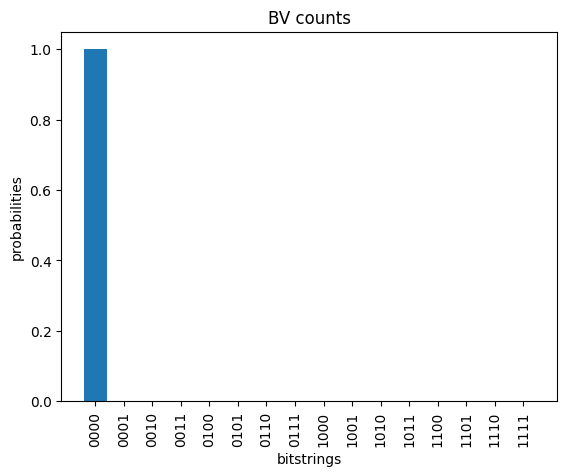

In [6]:
plot_bitstrings(bv_results, title="BV counts")

# Run on a noisy simulator

Let's try a noisy simulator

In [8]:
from braket.circuits.noises import BitFlip, Depolarizing

noisy_bv_circuit = (
    bernstein_vazirani_circuit(oracle)
    .apply_gate_noise(Depolarizing(0.01))
    .apply_readout_noise(BitFlip(0.1))
)
print(noisy_bv_circuit)

T  : |     0      |           1           |            2             |Result Types|
                                                                                   
q0 : -H-DEPO(0.01)-C-DEPO(0.01)------------H-------DEPO(0.01)-BF(0.1)-Probability--
                   |                                                  |            
q1 : -H-DEPO(0.01)-|-I----------DEPO(0.01)-H-------DEPO(0.01)-BF(0.1)-Probability--
                   |                                                  |            
q2 : -H-DEPO(0.01)-|-I----------DEPO(0.01)-H-------DEPO(0.01)-BF(0.1)-Probability--
                   |                                                  |            
q3 : -H-DEPO(0.01)-X-DEPO(0.01)------------H-------DEPO(0.01)-BF(0.1)-Probability--
                                                                                   
q4 : -H-DEPO(0.01)-Z-DEPO(0.01)------------BF(0.1)---------------------------------

T  : |     0      |           1           |            2             |Resul

In [9]:
local_simulator = LocalSimulator("braket_dm")

task = local_simulator.run(noisy_bv_circuit, shots=1_000)

noisy_bv_results = get_bernstein_vazirani_results(task)

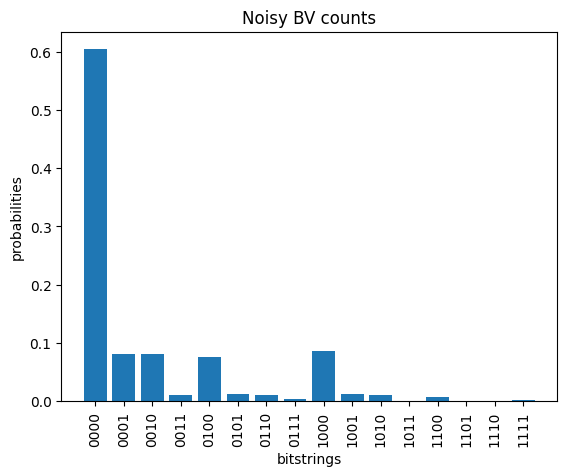

In [10]:
plot_bitstrings(noisy_bv_results, title="Noisy BV counts")

In [11]:
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost() :.2f} USD"
)

Estimated cost to run this example: 0.00 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).